In [2]:
!pip install -q kaggle

In [1]:
import os

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shobhitssolanki","key":"04a5910d898f0ddaf24b88037e5f76e8"}'}

In [13]:
! rmdir /.kaggle

In [14]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [17]:
os.listdir('/root/.kaggle')

['kaggle.json']

In [18]:
! chmod 600 ~/.kaggle/kaggle.json

In [19]:
import pandas as pd

In [20]:
! kaggle datasets download -d itsdaniyal/malerial-cell-classification-dataset

 99% 336M/338M [00:14<00:00, 21.1MB/s]
100% 338M/338M [00:14<00:00, 24.6MB/s]


In [21]:
! unzip malerial-cell-classification-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_91.png  
  inflating: cell_ima

In [22]:
os.listdir('/content/cell_images/cell_images/Uninfected')

['C168P129ThinF_IMG_20151118_154651_cell_112.png',
 'C91P52ThinF_IMG_20150821_123116_cell_12.png',
 'C189P150ThinF_IMG_20151203_141110_cell_36.png',
 'C163P124ThinF_IMG_20151116_111147_cell_130.png',
 'C68P29N_ThinF_IMG_20150819_134112_cell_99.png',
 'C186P147NThinF_IMG_20151203_150808_cell_104.png',
 'C74P35_ThinF_IMG_20150815_120957_cell_36.png',
 'C38P3thinF_original_IMG_20150621_112138_cell_17.png',
 'C240ThinF_IMG_20151127_115306_cell_110.png',
 'C178P139NThinF_IMG_20151201_153246_cell_23.png',
 'C150P111ThinF_IMG_20151115_115950_cell_41.png',
 'C156P117ThinF_IMG_20151115_155104_cell_188.png',
 'C12NThinF_IMG_20150614_124301_cell_164.png',
 'C145P106ThinF_IMG_20151016_154756_cell_31.png',
 'C208ThinF_IMG_20151029_155411_cell_14.png',
 'C74P35_ThinF_IMG_20150815_120712_cell_26.png',
 'C142P103ThinF_IMG_20151005_221900_cell_97.png',
 'C3thin_original_IMG_20150608_162835_cell_144.png',
 'C89P50ThinF_IMG_20150820_162504_cell_40.png',
 'C169P130ThinF_IMG_20151119_144354_cell_228.png',


In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
from matplotlib.image import imread

In [25]:
my_image=os.listdir('/content/cell_images/cell_images/Parasitized')[0]

In [26]:
my_image

'C39P4thinF_original_IMG_20150622_110115_cell_115.png'

In [27]:
cell='/content/cell_images/cell_images/Parasitized/C188P149ThinF_IMG_20151203_134319_cell_194.png'

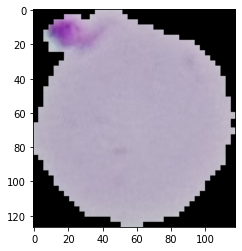

In [28]:
plt.imshow(imread(cell))

In [ ]:
#/content/kaggle.json
#/content/drive/MyDrive/cell_images

0.84313726

In [29]:
uninf=os.listdir('/content/cell_images/cell_images/Uninfected')[0]
uninf

'C168P129ThinF_IMG_20151118_154651_cell_112.png'

In [30]:
cell2='/content/cell_images/cell_images/Uninfected/C105P66ThinF_IMG_20150924_095034_cell_53.png'

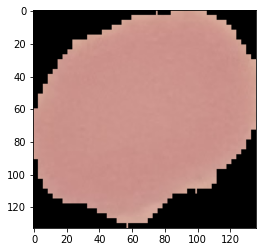

In [31]:
plt.imshow(imread(cell2))

In [32]:
len(os.listdir('/content/cell_images/cell_images/Parasitized'))

13780

In [33]:
len(os.listdir('/content/cell_images/cell_images/Uninfected'))

13780

In [34]:
para_path='/content/cell_images/cell_images/Parasitized'
uninf_path='/content/cell_images/cell_images/Uninfected'

In [35]:
dim1=[]
dim2=[]
for file_name in os.listdir(uninf_path):
  if (file_name.endswith('.png')):
    img=imread(uninf_path+'/'+file_name)
    d1,d2,colors=img.shape
    dim1.append(d1)
    dim2.append(d2)

In [36]:
len(dim1)

13779

In [37]:
len(dim2)

13779

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


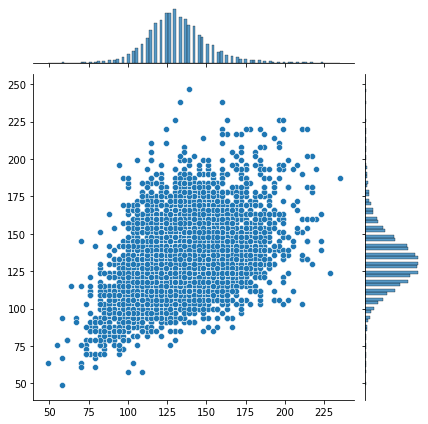

In [38]:
sns.jointplot(dim1,dim2)

In [39]:
np.mean(dim1)

131.58001306335728

In [40]:
np.mean(dim2)

131.3424776834313

In [41]:
image_shape=(130,130,3)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
image_gen=ImageDataGenerator(rotation_range=20,width_shift_range=.1,height_shift_range=0.1,shear_range=.1,zoom_range=.1,horizontal_flip=True,fill_mode='nearest',validation_split=0.1)

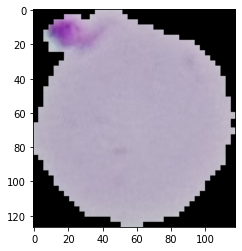

In [45]:
plt.imshow(imread(cell))

In [46]:
para_img=imread(cell)

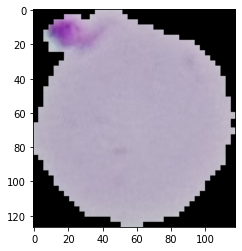

In [47]:
plt.imshow(para_img)

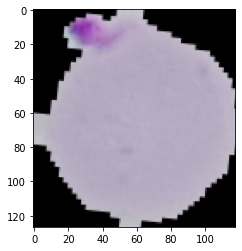

In [48]:
plt.imshow(image_gen.random_transform(para_img))

In [49]:
image_gen.flow_from_directory('/content/cell_images/cell_images')

Found 27558 images belonging to 2 classes.


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [51]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [54]:
batch_size=16

In [55]:
train_dir='/content/cell_images/cell_images'

In [56]:
train_generator=image_gen.flow_from_directory(train_dir,target_size=image_shape[:2],batch_size=batch_size,color_mode='rgb',class_mode='binary',subset='training')

Found 24804 images belonging to 2 classes.


In [57]:
test_generator=image_gen.flow_from_directory(train_dir,target_size=image_shape[:2],batch_size=batch_size,color_mode='rgb',class_mode='binary',subset='validation',shuffle=False)

Found 2754 images belonging to 2 classes.


In [58]:
train_generator.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [59]:
test_generator.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [60]:
results=model.fit_generator(train_generator,epochs=20,validation_data=test_generator,callbacks=[early_stop])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
1551/1551 [==============================] - 143s 84ms/step - loss: 0.9720 - accuracy: 0.5533 - val_loss: 0.7055 - val_accuracy: 0.5211
Epoch 2/20
1551/1551 [==============================] - 126s 81ms/step - loss: 0.6746 - accuracy: 0.5857 - val_loss: 0.6595 - val_accuracy: 0.6158
Epoch 3/20
1551/1551 [==============================] - 130s 84ms/step - loss: 0.6696 - accuracy: 0.5998 - val_loss: 0.6573 - val_accuracy: 0.6420
Epoch 4/20
1551/1551 [==============================] - 131s 85ms/step - loss: 0.6683 - accuracy: 0.6030 - val_loss: 0.6506 - val_accuracy: 0.6256
Epoch 5/20
1551/1551 [==============================] - 126s 81ms/step - loss: 0.4592 - accuracy: 0.7710 - val_loss: 0.2304 - val_accuracy: 0.9234
Epoch 6/20
1551/1551 [==============================] - 129s 83ms/step - loss: 0.1877 - accuracy: 0.9416 - val_loss: 0.2114 - val_accuracy: 0.9165
Epoch 7/20
1551/1551 [==============================] - 127s 82ms/step - loss: 0.1789 - accuracy: 0.9455 - val_loss: 0

In [61]:
metrices=pd.DataFrame(model.history.history)

In [62]:
model.metrics_names

['loss', 'accuracy']

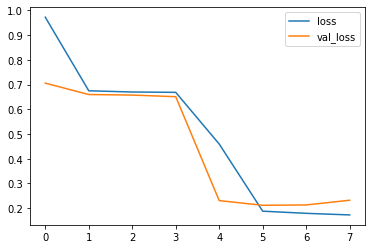

In [63]:
metrices[['loss','val_loss']].plot()

In [ ]:
model.evaluate_generator(test_generator)

In [64]:
pred=model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [85]:
predictions= pred > .7

In [67]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [68]:
len(pred)

2754

In [69]:
test_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
print(classification_report(test_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1377
           1       0.92      0.94      0.93      1377

    accuracy                           0.93      2754
   macro avg       0.93      0.93      0.93      2754
weighted avg       0.93      0.93      0.93      2754



In [87]:
confusion_matrix(test_generator.classes,predictions)

array([[1258,  119],
       [  83, 1294]])

In [73]:
from tensorflow.keras.preprocessing import image

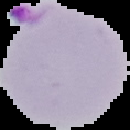

In [84]:
new_image=image.load_img(cell,target_size=image_shape)
new_image

In [76]:
new_image_arr=image.img_to_array(new_image)

In [79]:
new_image_arr.shape

(130, 130, 3)

In [80]:
new_image_arr=np.expand_dims(new_image_arr,axis=0)

In [81]:
new_image_arr.shape

(1, 130, 130, 3)

In [89]:
model.predict(new_image_arr)>0.7

array([[False]])